In [40]:
import pandas as pd
import numpy as np
import cpi
from tqdm import tqdm, tqdm_notebook
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from src.Time_Series_Helper_Funcs import *
from src.Regression_Helper_Funcs import *
from src.ARIMA_Helper_Funcs import *
from src.Prep_Class import *

/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.labe

In [91]:
file_path_1 = '/Users/jenniferpaige/Desktop/TTS_10-Dec-2019_p1.csv'
file_path_2 = '/Users/jenniferpaige/Desktop/TTS_10-Dec-2019_p2.csv'
files = [file_path_1, file_path_2]
loaded_files = []
count = 0
for i in tqdm(range(1, len(files)+1)):
    exec(f"df{i} = pd.read_csv(files[{count}],encoding='iso-8859-1', parse_dates=['Installation Date'], usecols=['Installation Date','System Size','Total Installed Price','Customer Segment', 'State'],na_values=(-9999, '-9999'))")
    count+=1
[exec("loaded_files.append(df{})".format(i)) for i in range(1, len(files)+1)]
if len(loaded_files) > 1:
    df = pd.concat([i for i in loaded_files],ignore_index=True)
else: 
    df=loaded_files[0]
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.sort_values('installation_date', inplace=True)
df.set_index('installation_date', drop=True, inplace=True)
[df['total_installed_price'].replace(np.nan,round(df.loc[(df['total_installed_price'] != np.nan) & (df.index.year == i)]['total_installed_price'].median(),2),inplace=True) for i in tqdm(range(1998,2019))] 
df['date'] = df.index.date
df['adj_installed_price'] = round(df.apply(lambda x:cpi.inflate(x.total_installed_price, x.date), axis=1),2)
df['cost_per_watt'] = round(df['adj_installed_price']/ df['system_size']/1000,2)
null_list = []
for i in tqdm(range(len(df.cost_per_watt.resample('W').median()))):
    if df.cost_per_watt.resample('W').median()[i] >0:
        pass
    else:
        null_list.append(i)
y = df.cost_per_watt.resample('W').median()[null_list[-1]+1:]
if round(adfuller(y)[1],4) < 0.51:
    print("|       ADF P-value: {} \n|       Time Series achieved stationarity. \n|       Reject ADF H0".format(round(adfuller(y)[1],4)))
else:
    print('|       ADF P-value: {} \n|       Time Series is not stationary.   \n|       Fail to reject ADF H0'.format(round(adfuller(y)[1],4)))
weekly_differences = y.diff(periods=1).dropna()
if round(adfuller(weekly_differences)[1],4) < 0.51: 
    print('|       ADF P-value: {} \n|       Differenced data achieved stationarity. \n|       Reject ADF H0'.format(round(adfuller(weekly_differences)[1],4)))

100%|██████████| 1093/1093 [00:54<00:00, 19.95it/s]


|       ADF P-value: 0.9509 
|       Time Series is not stationary.   
|       Fail to reject ADF H0
|       ADF P-value: 0.0 
|       Differenced data achieved stationarity. 
|       Reject ADF H0


In [87]:
file_path_1 = '/Users/jenniferpaige/Desktop/TTS_10-Dec-2019_p1.csv'
file_path_2 = '/Users/jenniferpaige/Desktop/TTS_10-Dec-2019_p2.csv'
files = [file_path_1, file_path_2]
loaded_files = []
count = 0
for i in tqdm(range(1, len(files)+1)):
    exec(f"df{i} = pd.read_csv(files[{count}],encoding='iso-8859-1', parse_dates=['Installation Date'], usecols=['Installation Date','System Size','Total Installed Price','Customer Segment', 'State'],na_values=(-9999, '-9999'))")
    count+=1
[exec("loaded_files.append(df{})".format(i)) for i in range(1, len(files)+1)]
if len(loaded_files) > 1:
    df = pd.concat([i for i in loaded_files],ignore_index=True)
else: 
    df=loaded_files[0]
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.sort_values('installation_date', inplace=True)
df.set_index('installation_date', drop=True, inplace=True)
[df['total_installed_price'].replace(np.nan,round(df.loc[(df['total_installed_price'] != np.nan) & (df.index.year == i)]['total_installed_price'].mean(),2),inplace=True) for i in tqdm(range(1998,2019))] 
df['date'] = df.index.date
df['adj_installed_price'] = round(df.apply(lambda x:cpi.inflate(x.total_installed_price, x.date), axis=1),2)
df['cost_per_watt'] = round(df['adj_installed_price']/ df['system_size']/1000,2)
null_list = []
for i in tqdm(range(len(df.cost_per_watt.resample('W').mean()))):
    if df.cost_per_watt.resample('W').mean()[i] >0:
        pass
    else:
        null_list.append(i)
y = df.cost_per_watt.resample('W').mean()[null_list[-1]+1:]
if round(adfuller(y)[1],4) < 0.51:
    print("|       ADF P-value: {} \n|       Time Series achieved stationarity. \n|       Reject ADF H0".format(round(adfuller(y)[1],4)))
else:
    print('|       ADF P-value: {} \n|       Time Series is not stationary.   \n|       Fail to reject ADF H0'.format(round(adfuller(y)[1],4)))
weekly_differences = y.diff(periods=1).dropna()
if round(adfuller(weekly_differences)[1],4) < 0.51: 
    print('|       ADF P-value: {} \n|       Differenced data achieved stationarity. \n|       Reject ADF H0'.format(round(adfuller(weekly_differences)[1],4)))

100%|██████████| 1093/1093 [00:28<00:00, 38.56it/s]


|       ADF P-value: 0.109 
|       Time Series achieved stationarity. 
|       Reject ADF H0
|       ADF P-value: 0.0 
|       Differenced data achieved stationarity. 
|       Reject ADF H0


In [88]:
diff= pd.DataFrame(weekly_differences.copy())

In [89]:
y_preds = regres_dfs(diff)
y_train = train_test_lag(diff, Xy=True)[1]

/Users/jenniferpaige/getit/Solar/src/Regression_Helper_Funcs.py:105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf= RandomForestRegressor(n_jobs=-1).fit(X_train,y_train).predict(X_test)


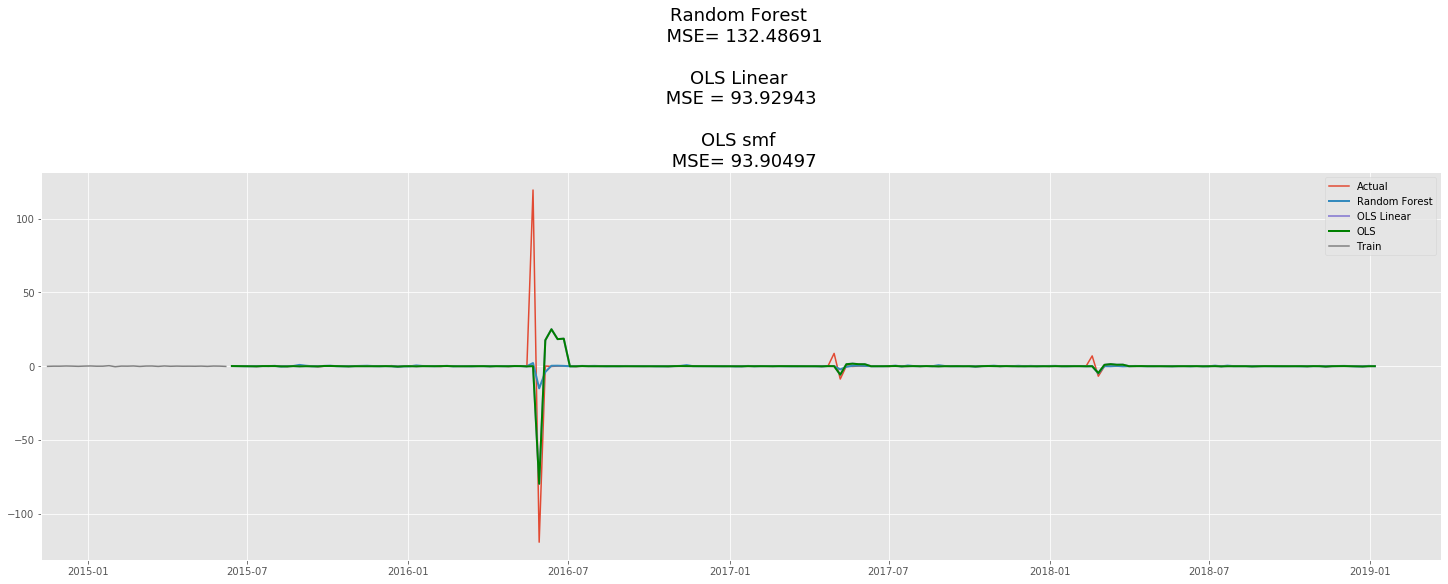

In [90]:
fig, ax = plt.subplots(figsize=(20,8) , constrained_layout=True)
ax.plot(y_train[-30:], label='Train', color='gray')
ax.plot(y_preds.actual, label= 'Actual')
ax.plot(y_preds.randomforest, label= 'Random Forest', linewidth=2)
ax.plot(y_preds.olslinear, label= 'OLS Linear', linewidth=2)
ax.plot(y_preds.olssmf, label= 'OLS', linewidth=2,  color='g')

ax.set_title('Random Forest \n  MSE= {} \n \nOLS Linear \n MSE = {} \n \nOLS smf \n MSE= {}'.format(round(mean_squared_error(y_preds.actual, y_preds.randomforest),5), round(mean_squared_error(y_preds.actual, y_preds.olslinear),5), round(mean_squared_error(y_preds.actual, y_preds.olssmf),5)), fontsize=18)
ax.legend(loc='best')
ax.set_xlim(left= y_train.index.date[-31])
#fig.suptitle(' Regression Models \n Forecast For:     [{}] - [{}] \n Trained On:       [{}] - [{}]\n '.format(pred_s, pred_e, train_s, train_e), fontsize=20)
plt.show()

In [67]:
week_diff

,cost_per_watt
installation_date,
2001-01-28,5.219167
2001-02-04,-5.429167
2001-02-11,18.448000
2001-02-18,-10.221333
2001-02-25,-6.585952
...,...
2018-12-09,0.003278
2018-12-16,0.189128
2018-12-23,-0.129327


In [6]:
df['year'] = df.index.year

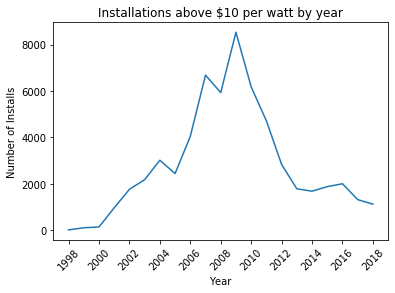

In [7]:
plt.plot(df.loc[df.cost_per_watt >10].groupby('year').count().system_size)
plt.title('Installations above $10 per watt by year')
plt.xlabel('Year')
plt.ylabel('Number of Installs')
plt.xticks(ticks= list(df.year.unique())[::2], rotation=45)
plt.show()

In [8]:
print('Mean Cost Per Watt By Year')
df.cost_per_watt.groupby(df['year']).mean()

Mean Cost Per Watt By Year


year
1998    25.538846
1999    11.555160
2000    14.432810
2001    12.577473
2002    11.632536
2003    11.163529
2004    10.325487
2005    10.134592
2006     9.789249
2007     9.979351
2008     9.784714
2009     9.849535
2010     8.471296
2011     6.956878
2012     5.944160
2013     5.122213
2014     4.361602
2015     4.368790
2016     6.842455
2017     4.167934
2018     3.950167
Name: cost_per_watt, dtype: float64

In [178]:
df.loc[(df['cost_per_watt'] > 25.538846) & (df['year'] == 1998)]

,system_size,total_installed_price,customer_segment,state,date,adj_installed_price,cost_per_watt,year,sys_size_group
installation_date,,,,,,,,,
1998-03-01,0.650,17640.08,RES,NM,1998-03-01,28071.33,43.19,1998,"(0.0, 2.5]"
1998-05-12,0.600,17439.00,RES,OR,1998-05-12,27649.06,46.08,1998,"(0.0, 2.5]"
1998-10-01,0.100,17640.08,RES,NM,1998-10-01,27763.23,277.63,1998,"(0.0, 2.5]"
1998-12-24,0.462,11423.00,RES,CA,1998-12-24,17989.31,38.94,1998,"(0.0, 2.5]"


In [ ]:
df.loc[(df['cost_per_watt'] > 25.538846) & (df['year'] == 1998)]

In [10]:
df.cost_per_watt.mean(axis=0)

5.41348102221054

In [11]:
sys_bins = [0.0, 2.5, 5.0, 7.5, 10, 12.5, 17.5, 42.5, 18000]

df['sys_size_group'] = pd.cut(df['system_size'], sys_bins)

pivot_tb = pd.pivot_table(df, values='cost_per_watt', index='year', columns='sys_size_group')

size_df = df.copy()

size_dummies = pd.get_dummies(size_df['sys_size_group'])

size_df = pd.concat([size_df, size_dummies], axis=1)

In [19]:
pivot_tb

sys_size_group,"(0.0, 2.5]","(2.5, 5.0]","(5.0, 7.5]","(7.5, 10.0]","(10.0, 12.5]","(12.5, 17.5]","(17.5, 42.5]","(42.5, 18000.0]"
year,,,,,,,,
1998,40.672857,7.613333,5.110000,NaN,NaN,20.710000,NaN,0.250000
1999,15.584421,9.398133,9.535625,5.727143,7.428889,5.200000,7.290000,0.276667
2000,17.636126,11.069848,13.615333,7.275385,10.005000,NaN,NaN,3.840000
2001,14.918981,11.334150,10.573846,8.325429,9.645217,9.780000,7.338571,3.247500
2002,14.807557,11.333492,9.542649,8.062500,9.230818,7.893333,8.159000,2.846250
2003,13.414016,10.866144,9.950793,9.338964,16.123333,7.829211,8.148955,4.820000
2004,13.037209,10.093871,9.459725,9.022483,8.478035,8.179667,7.904122,6.906100
2005,14.487545,9.554695,8.874252,9.334893,8.601245,7.978939,7.754309,5.935468
2006,12.626069,9.760397,9.073150,9.069921,7.969413,8.542579,7.713866,6.704598


In [20]:
sizes_nums = []
for i in tqdm(range(len(size_df))):
    sizes_nums.append( str(size_df.sys_size_group[i]))

100%|██████████| 1543831/1543831 [01:43<00:00, 14852.71it/s]


In [21]:
size_df['size_group'] = sizes_nums

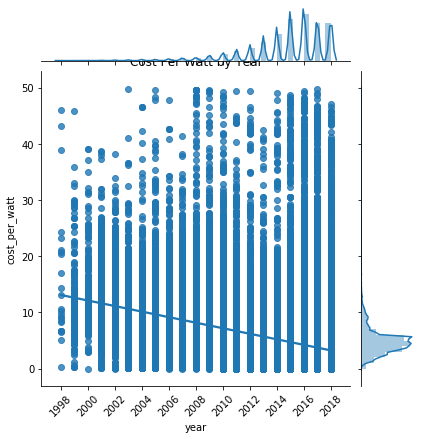

In [22]:
sns.jointplot(y='cost_per_watt' , x='year' , kind='reg', data=size_df.loc[size_df['cost_per_watt'] < 50])
plt.title('Cost Per Watt by Year', loc='center')
plt.xticks(ticks= list(size_df.year.unique())[::2], rotation=45)
plt.show()

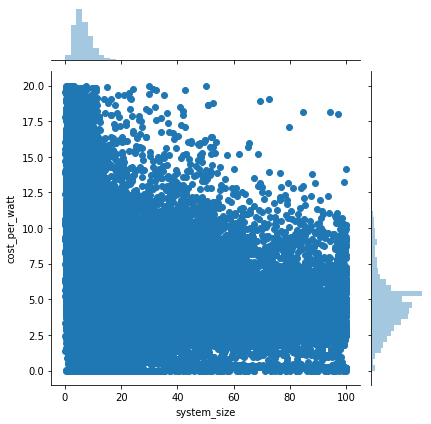

In [129]:
sns.jointplot(x='system_size' , y='cost_per_watt', kind='reg', 
              data=size_df.loc[(size_df['cost_per_watt'] < 50) & (size_df['system_size']<100)])

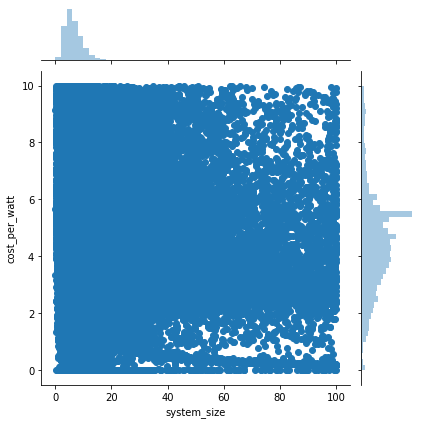

In [132]:
sns.jointplot(x='system_size' , y='cost_per_watt' ,  data=size_df.loc[(size_df['cost_per_watt'] < 10) & (size_df['system_size']<100)])

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(15,15), constrained_layout=True)
time_list, time_type = ['D', 'W', 'M', 'Q', 'Y'], ['Daily', 'Weekly', 'Monthly', 'Quarterly', 'Yearly']
time_dict = dict(zip(time_list, time_type))
resam_list = ['mean', 'median']
loc_list = [[0,0], [0,1],[1,0], [1,1], [2,0],[2,1], [3,0]]
time_cnt, count = 0,0

for t in time_list:
    for i in range(2):
        exec(f"ax{loc_list[i]}.plot(df.cost_per_watt.resample('{time_list[time_cnt]}').{resam_list[i]}(), label='{time_dict.get(time_list[time_cnt])} {resam_list[i]}'.title()) ")
        exec(f"ax{loc_list[i]}.set_title('{resam_list[i]} Resamples'.title())")
    time_cnt+=1

for i in range (2,7):
    for r in range(2):
        exec(f"ax{loc_list[i]}.plot(df.cost_per_watt.resample('{time_list[count]}').{resam_list[r]}(), label='{resam_list[r]}'.title())")
        exec(f"ax{loc_list[i]}.set_title('{time_dict.get(time_list[count])} averages'.title())")
    count+=1

for i in range(7):
    exec(f"ax{loc_list[i]}.legend(loc='upper right')")
    exec(f"ax{loc_list[i]}.set_ylim(0,50)")

plt.savefig("mean_and_median_resamples.png")